In [11]:
import math

def calculate_real_width(fov, distance_to_object, width_in_pixels, image_width_pixels):
    """
    Calculate the real-life width of an object using the field of view (FOV).

    Parameters:
    fov (float): Field of view of the camera in degrees.
    distance_to_object (float): Distance from the camera to the object in millimeters (mm).
    width_in_pixels (int): Width of the object in pixels on the image sensor.
    image_width_pixels (int): Total width of the image in pixels.

    Returns:
    float: Real-life width of the object in centimeters (cm).
    """
    # Convert FOV from degrees to radians
    fov_rad = math.radians(fov)

    # Calculate the width of the image sensor plane in millimeters
    sensor_width_mm = 2 * distance_to_object * math.tan(fov_rad / 2)

    # Calculate the width of the object in the image sensor plane in millimeters
    width_in_sensor_mm = (width_in_pixels / image_width_pixels) * sensor_width_mm

    # Convert the width from millimeters to centimeters
    real_width_cm = width_in_sensor_mm / 10

    return real_width_cm

# Example usage
fov = 63  # Field of view in degrees (example value)
distance_to_object = 650  # Distance to object in millimeters
width_in_pixels = 55  # Width of the object in pixels
image_width_pixels = 2988  # Total width of the image in pixels (example value)

# Calculate the real-life width
real_width = calculate_real_width(fov, distance_to_object, width_in_pixels, image_width_pixels)
print(f"The real-life width of the object is {real_width} cm.")



The real-life width of the object is 1.466374041231765 cm.


In [15]:
import math

def calculate_real_size(distance, fov, sensor_size, image_width_pixels, object_size_pixels):
    # Convert FOV from degrees to radians
    fov_rad = math.radians(fov)
    
    # Calculate the Real Field of View (RFOV)
    rfov = 2 * (distance * math.tan(fov_rad / 2))
    
    # Calculate the Image Scale (meters per pixel)
    image_scale = rfov / image_width_pixels
    
    # Calculate the Real Size of the Object
    real_size = object_size_pixels * image_scale
    
    return real_size

# Example parameters
distance = 650  # in meters
fov = 109  # in degrees
sensor_size = 36  # in mm (not used in this calculation directly)
image_width_pixels = 5312  # in pixels
object_size_pixels = 55  # in pixels

# Calculate the real size of the object
real_size = calculate_real_size(distance, fov, sensor_size, image_width_pixels, object_size_pixels)

print(f"The real size of the object is approximately {real_size:.3f} meters.")

The real size of the object is approximately 18.870 meters.


# calculate focal length

In [26]:





def calculate_focal_length(object_size_pixels, pixel_size_mm, object_distance_mm, object_size_mm):
    """
    Calculate the focal length of a camera.

    Parameters:
    object_size_pixels (int): Size of the object in pixels.
    pixel_size_mm (float): Size of one pixel in millimeters (mm).
    object_distance_mm (float): Distance from the camera to the object in millimeters (mm).
    object_size_mm (float): Real-life size of the object in millimeters (mm).

    Returns:
    float: Focal length in millimeters (mm).
    """
    # Calculate the width of the object on the sensor in millimeters
    sensor_width_mm = object_size_pixels * pixel_size_mm

    # Calculate the focal length using the provided formula
    focal_length_mm = (sensor_width_mm * object_distance_mm) / object_size_mm

    return focal_length_mm

# Example values
pixel_size_mm = 0.00716844
object_size_mm = 15
object_size_pixels =69
object_distance_mm = 702

 


# Calculate focal length
focal_length = calculate_focal_length(object_size_pixels, pixel_size_mm, object_distance_mm, object_size_mm)

# Output the result
print(f"The calculated focal length is approximately {focal_length:.2f} mm")

    

The calculated focal length is approximately 23.15 mm


In [27]:
data = {
    "objectpixels": [106, 117, 146,70,60],
    "distance": [478, 425, 375, 702,830],
    
    
}

The mean focal length is 23.64 mm
std 0.1577056799999994


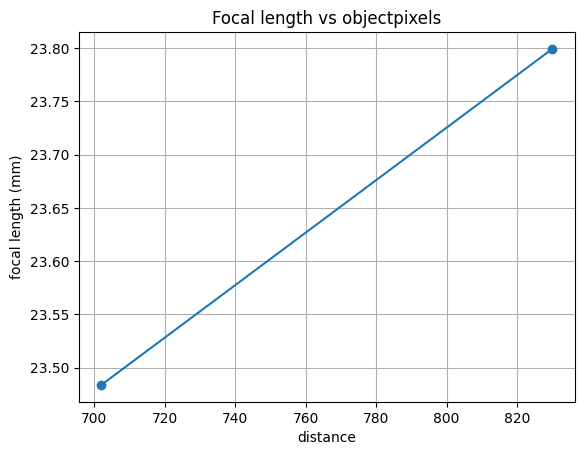

In [28]:
data = {
    "objectpixels": [70,60],
    "distance": [ 702,830],
    
    
}

focal_lengths=[]

for i in range(len(data["objectpixels"])):
    focal_length = calculate_focal_length(data["objectpixels"][i], pixel_size_mm, data["distance"][i], object_size_mm)
    focal_lengths.append(focal_length)

mean_focal_length = sum(focal_lengths) / len(focal_lengths)  

import numpy as np

print (f"The mean focal length is {mean_focal_length:.2f} mm")
print('std' , np.std(focal_lengths))


#linear graph
import matplotlib.pyplot as plt

plt.plot(data["distance"], focal_lengths, 'o-')
plt.xlabel('distance')
plt.ylabel('focal length (mm)')
plt.title('Focal length vs objectpixels')
plt.grid()
plt.show()


The mean focal length is 35.21 mm
std 0.4881707639999995


In [32]:
def calculate_focal_length_pixels(focal_length_mm, pixel_size_mm):
    """
    Calculate the focal length in pixels for the camera matrix.

    Parameters:
    focal_length_mm (float): Focal length in millimeters (mm).
    pixel_size_mm (float): Size of one pixel in millimeters (mm).

    Returns:
    float: Focal length in pixels.
    """
    focal_length_pixels = focal_length_mm / pixel_size_mm
    return focal_length_pixels

# Example values
focal_length_mm = 25.6# from previous calculation
pixel_size_mm = 0.00716844

# Calculate focal length in pixels
focal_length_pixels = calculate_focal_length_pixels(focal_length_mm, pixel_size_mm)

# Output the result
print(f"The focal length in the camera matrix is approximately {focal_length_pixels:.2f} pixels")


The focal length in the camera matrix is approximately 3571.21 pixels


In [36]:
import math

# Given values
horizontal_fov =109  # degrees
image_width = 5312  # pixels

# Calculate half values
half_fov = horizontal_fov / 2
half_image_width = image_width / 2

# Convert angle to radians
half_fov_rad = math.radians(half_fov)

# Calculate focal length in pixels
focal_length_pixels = half_image_width / math.tan(half_fov_rad)

print(f"Focal length: {focal_length_pixels:.2f} pixels")

# If pixel size is known (example: 5.6 μm), uncomment the following lines
# pixel_size_um = 5.6
# focal_length_mm = (focal_length_pixels * pixel_size_um) / 1000
# print(f"Focal length: {focal_length_mm:.2f} mm")

Focal length: 1894.51 pixels


In [48]:
3328 *0.00716844

23.85656832

In [38]:
def calculate_focal_length(sensor_height_mm, image_height_pixels, object_height_pixels, real_object_height_mm, distance_to_object_mm):
    # Step 1: Calculate Object Height on Sensor in mm
    object_height_on_sensor_mm = (object_height_pixels / image_height_pixels) * sensor_height_mm
    
    # Step 2: Calculate Focal Length using the formula
    focal_length_mm = (object_height_on_sensor_mm * distance_to_object_mm) / real_object_height_mm
    
    return focal_length_mm

# Example input values based on a 1/1.9" sensor
sensor_height_mm = 5.7  # Sensor height in millimeters for a 1/1.9" sensor
image_height_pixels = 2988  # Image height in pixels
object_height_pixels = 55  # Object height in pixels in the image
real_object_height_mm = 10  # Real object height in millimeters (e.g., 2 meters)
distance_to_object_mm = 650  # Distance to the object in millimeters (e.g., 10 meters)

# Calculate the focal length
focal_length_mm = calculate_focal_length(sensor_height_mm, image_height_pixels, object_height_pixels, real_object_height_mm, distance_to_object_mm)

# Print the focal length
print(f"The calculated focal length is: {focal_length_mm:.2f} mm")



The calculated focal length is: 6.82 mm


In [45]:
def calculate_real_object_height(focal_length_mm, sensor_height_mm, image_height_pixels, object_height_pixels, distance_to_object_mm):
    # Step 1: Calculate Object Height on Sensor in mm
    object_height_on_sensor_mm = (object_height_pixels / image_height_pixels) * sensor_height_mm
    
    # Step 2: Calculate Real Object Height using the formula
    real_object_height_mm = (object_height_on_sensor_mm * distance_to_object_mm) / focal_length_mm
    
    return real_object_height_mm

# Example input values
focal_length_mm = 6.82  # Focal length in millimeters (calculated earlier)
sensor_height_mm = 5.7  # Sensor height in millimeters for a 1/1.9" sensor
image_height_pixels = 2988  # Image height in pixels
object_height_pixels = 94  # Object height in pixels in the image
distance_to_object_mm = 400  # Distance to the object in millimeters

# Calculate the real object height
real_object_height_mm = calculate_real_object_height(focal_length_mm, sensor_height_mm, image_height_pixels, object_height_pixels, distance_to_object_mm)

# Print the real object height
print(f"The calculated real object height is: {real_object_height_mm:.2f} mm")


The calculated real object height is: 10.52 mm


In [53]:
def calculate_real_object_size(focal_length_pixels, object_size_pixels, distance_to_object_mm):
    """
    Calculate the real-world size of an object using the focal length in pixels.

    Parameters:
    focal_length_pixels (float): Focal length in pixels.
    object_size_pixels (int): Size of the object in pixels in the image.
    distance_to_object_mm (float): Distance from the camera to the object in millimeters.

    Returns:
    float: Real-world size of the object in millimeters.
    """
    # Calculate the real object size using the formula
    real_object_size_mm = (object_size_pixels * distance_to_object_mm) / focal_length_pixels
    
    return real_object_size_mm

# Example values
focal_length_pixels = 3034  # Focal length in pixels
object_size_pixels = 50 # Object size in pixels in the image
distance_to_object_mm = 650  # Distance to the object in millimeters

# Calculate the real object size
real_object_size_mm = calculate_real_object_size(focal_length_pixels, object_size_pixels, distance_to_object_mm)

# Output the result
print(f"The calculated real object size is approximately {real_object_size_mm:.2f} mm")


The calculated real object size is approximately 10.71 mm


In [54]:
import math

# Given values
sensor_diagonal = 8.35  # in mm
FoV_diagonal = 123  # diagonal field of view in degrees

# Convert FoV from degrees to radians
FoV_diagonal_rad = math.radians(FoV_diagonal)

# Calculate the effective focal length
effective_focal_length = sensor_diagonal / (2 * math.tan(FoV_diagonal_rad / 2))
effective_focal_length


2.266840045990474

109	63	123

In [29]:
import math

def calculate_real_world_coverage(fov_degrees, distance_mm):
    fov_rad = math.radians(fov_degrees)
    coverage_mm = 2 * distance_mm * math.tan(fov_rad / 2)
    return coverage_mm
def calculate_scale_factor(coverage_mm, image_size_pixels):
    return coverage_mm / image_size_pixels  # mm per pixel
def pixel_to_real_world(u, v, u0, v0, Sx, Sy):
    X = (u - u0) * Sx
    Y = (v - v0) * Sy
    return X, Y
def calculate_real_world_distance(u1, v1, u2, v2, u0, v0, Sx, Sy):
    X1, Y1 = pixel_to_real_world(u1, v1, u0, v0, Sx, Sy)
    X2, Y2 = pixel_to_real_world(u2, v2, u0, v0, Sx, Sy)
    distance = math.hypot(X2 - X1, Y2 - Y1)
    return distance




In [32]:
distance_mm = 702 # Distance to floor

# Camera FOVs
horizontal_fov_deg = 109
vertical_fov_deg = 63

coverage_width_mm = calculate_real_world_coverage(horizontal_fov_deg, distance_mm)
coverage_height_mm = calculate_real_world_coverage(vertical_fov_deg, distance_mm)

print(f"Coverage Width (mm): {coverage_width_mm:.2f}")
print(f"Coverage Height (mm): {coverage_height_mm:.2f}")


Coverage Width (mm): 1968.34
Coverage Height (mm): 860.37


In [33]:
image_width_pixels = 5312
image_height_pixels = 2988

scale_x = calculate_scale_factor(coverage_width_mm, image_width_pixels)
scale_y = calculate_scale_factor(coverage_height_mm, image_height_pixels)

print(f"Scale X (mm/pixel): {scale_x:.4f}")
print(f"Scale Y (mm/pixel): {scale_y:.4f}")


Scale X (mm/pixel): 0.3705
Scale Y (mm/pixel): 0.2879


In [34]:
# Image center coordinates
u0 = image_width_pixels / 2
v0 = image_height_pixels / 2

# Object endpoints in pixels
u1, v1 = 2733,1384
u2, v2 = 2733+5, 1384+71

real_distance_mm = calculate_real_world_distance(u1, v1, u2, v2, u0, v0, scale_x, scale_y)

print(f"Real-world distance (mm): {real_distance_mm:.2f}")


Real-world distance (mm): 20.53


In [36]:
import math

def calculate_real_world_coverage(fov_degrees, distance_mm):
    fov_rad = math.radians(fov_degrees)
    coverage_mm = 2 * distance_mm * math.tan(fov_rad / 2)
    return coverage_mm

def calculate_scale_factor(coverage_mm, image_size_pixels):
    return coverage_mm / image_size_pixels

def calculate_real_world_length(pixel_distance, scale_mm_per_pixel):
    return pixel_distance * scale_mm_per_pixel

# Camera parameters
horizontal_fov_deg = 75  # Degrees
vertical_fov_deg = 46 # Degrees

# Image dimensions
image_width_pixels = 5312
image_height_pixels = 2988

# Distance to floor
distance_mm = 702  # mm

# Measured Euclidean distance in pixels
pixel_distance = 70  # pixels

# Step 1: Calculate real-world coverage
coverage_width_mm = calculate_real_world_coverage(horizontal_fov_deg, distance_mm)
coverage_height_mm = calculate_real_world_coverage(vertical_fov_deg, distance_mm)

print(f"Coverage Width (mm): {coverage_width_mm:.2f}")
print(f"Coverage Height (mm): {coverage_height_mm:.2f}")

# Step 2: Calculate scale factors
scale_x = calculate_scale_factor(coverage_width_mm, image_width_pixels)  # mm/pixel
scale_y = calculate_scale_factor(coverage_height_mm, image_height_pixels)  # mm/pixel

print(f"Scale X (mm/pixel): {scale_x:.4f}")
print(f"Scale Y (mm/pixel): {scale_y:.4f}")

# Step 3: Calculate real-world length
# Since the camera is pointed vertically downward and scale is uniform, we can average Sx and Sy
# or use the Euclidean distance scale. However, since Euclidean distance spans both axes,
# we need to account for different scales. One approach is to compute an effective scale.

# Compute effective scale (average)
effective_scale = (scale_x + scale_y) / 2
# Alternatively, compute based on the diagonal FOV
# If you have the diagonal FOV, you can compute the scale based on it
# but since you only have Sx and Sy, averaging is a simple approach

real_world_length_mm = calculate_real_world_length(pixel_distance, effective_scale)
print(f"Real-world length (mm): {real_world_length_mm:.2f}")


Coverage Width (mm): 1077.33
Coverage Height (mm): 595.96
Scale X (mm/pixel): 0.2028
Scale Y (mm/pixel): 0.1995
Real-world length (mm): 14.08


In [38]:
D=830
FOV=75


FOV_width=2*D*math.tan(math.radians(FOV/2))

real_world_length_mm=FOV_width*60/5312

print(f"Real-world length (mm): {real_world_length_mm:.2f}")

Real-world length (mm): 14.39


In [ ]:
  {"objectpixels": [106, 117, 146,70,60],
    "distance": [478, 425, 375, 702,830],}